주제:(2000년대의) 게임데이터분석을 통해 게임시장분석과 주로 마케팅 전략 분석으로 다음분기게임설계 

게임시장에 진출하고 한다면 반드시 알아야 할 게임시장분석과 독보적인 게임1등의 마케팅 전략 분석

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#한글깨짐방지

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
df=pd.read_csv('vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df=df.drop(columns=['Unnamed: 0'],axis=1)
df.head(2)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01


In [ ]:
df.duplicated().sum()

1

In [ ]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
df.dropna(inplace=True)#결측지가 있으면 int 변경이 안되기에 결측치 미리 제거 

In [ ]:
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [ ]:
df['Year']=df['Year'].astype('int'); #float int로 타입변경 

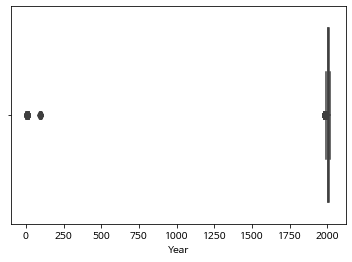

In [ ]:
sns.boxplot(x=df.Year);

In [ ]:
df = df.drop(index = df[df["Year"] < 2000].index) #2000년대 데이터 사용 
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16592,Minna no Chizu 2,PSP,2007,Misc,Zenrin,0,0,0.02,0
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13


In [ ]:
df.NA_Sales.unique()

array(['0.04', '0.17', '0', '0.12', '0.02', '0.07', '480K', '0.14',
       '0.01', '0.57', '0.08', '0.48', '0.05', '0.29', '0.19', '0.3',
       '0.11', '0.18', '0.33', '0.51', '60K', '0.06', '0.13', '0.34',
       '0.25', '0.41', '0.52', '0.03', '0.22', '0.35', '0.1', '0.67',
       '0.59', '0.36', '0.21', '1.19', '5.91', '1.98', '0.09', '0K',
       '0.5', '0.94', '0.16', '0.63', '0.43', '0.2', '1.23', '0.44',
       '0.42', '0.97', '2.67', '0.28', '6.05', '0.47', '0.49', '0.26',
       '0.24', '0.72', '0.46', '0.32', '1.53', '0.53', '0.37', '0.39',
       '0.58', '1.94', '2.31', '1.03', '0.82', '0.4', '0.23', '0.56',
       '0.96', '1.64', '0.69', '0.27', '0.92', '0.58M', '1.24', '0.25M',
       '0.86', '0.55', '1.54', '1.02', '1.27', '0.54', '0.15', '1.09',
       '3.44', '0.73', '0.88', '0.99', '1.15', '0.98', '0.75', '0.74',
       '0.7', '0.14M', '0.45', '1.2', '0.68', '1.23M', '1.56', '0.31',
       '1.45', '1.11', '2.9', '0M', '0.83', '0.78', '0.64', '1.08',
       '0.38', '1.

In [ ]:
#sales에 숫자가 아닌 문자가 들어간 데이터 삭제
#값 대체가 아닌 삭제를 선택한 이유 소수가 아닌 두자리 수의 정수의 값이 나중에 데이터분석하는데에 있어 이상치로 작용할 거 같아 미리 제거 
n=df[df['NA_Sales'].str.contains('[a-zA-Z]+')|df['EU_Sales'].str.contains('[a-zA-Z]+')|df['JP_Sales'].str.contains('[a-zA-Z]+')|df['Other_Sales'].str.contains('[a-zA-Z]+')].index
df.drop(n,inplace=True)
n

Int64Index([   10,    36,    45,    64,    73,    90,   128,   138,   145,
              176,
            ...
            16388, 16408, 16412, 16476, 16492, 16499, 16525, 16571, 16580,
            16591],
           dtype='int64', length=665)

In [ ]:
df['NA_Sales']=df['NA_Sales'].astype('float')
df['EU_Sales']=df['EU_Sales'].astype('float')
df['JP_Sales']=df['JP_Sales'].astype('float')
df['Other_Sales']=df['Other_Sales'].astype('float')

In [ ]:
#feature enginering
#Global_Sals 전반적인 동향을 살펴보기 위해 각 나라들의 sales 합
df['Global_Sales']=(df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales'])
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16592,Minna no Chizu 2,PSP,2007,Misc,Zenrin,0.00,0.00,0.02,0.00,0.02
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79


In [ ]:
#지역에 따라 선호하는 게임장르 
game_genre=df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
game_genre=game_genre.groupby(['Genre']).sum()
game_genre=game_genre.reset_index()
game_genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,704.35,446.13,124.35,169.62,1444.45
1,Adventure,80.06,48.83,35.63,14.72,179.24
2,Fighting,151.86,70.47,43.25,30.36,295.94
3,Misc,346.55,186.33,78.07,67.81,678.76
4,Platform,239.86,130.28,51.74,39.15,461.03
5,Puzzle,61.48,39.92,23.66,9.95,135.01
6,Racing,259.24,184.56,27.35,67.43,538.58
7,Role-Playing,243.03,133.29,209.24,43.78,629.34
8,Shooter,455.97,273.52,21.86,93.60,844.95
9,Simulation,155.77,98.56,39.35,27.43,321.11


In [ ]:
genre_melted=pd.melt(game_genre,id_vars=['Genre'],var_name='Country',value_name='Sales')
genre_melted

,Genre,Country,Sales
0,Action,NA_Sales,704.35
1,Adventure,NA_Sales,80.06
2,Fighting,NA_Sales,151.86
3,Misc,NA_Sales,346.55
4,Platform,NA_Sales,239.86
5,Puzzle,NA_Sales,61.48
6,Racing,NA_Sales,259.24
7,Role-Playing,NA_Sales,243.03
8,Shooter,NA_Sales,455.97
9,Simulation,NA_Sales,155.77


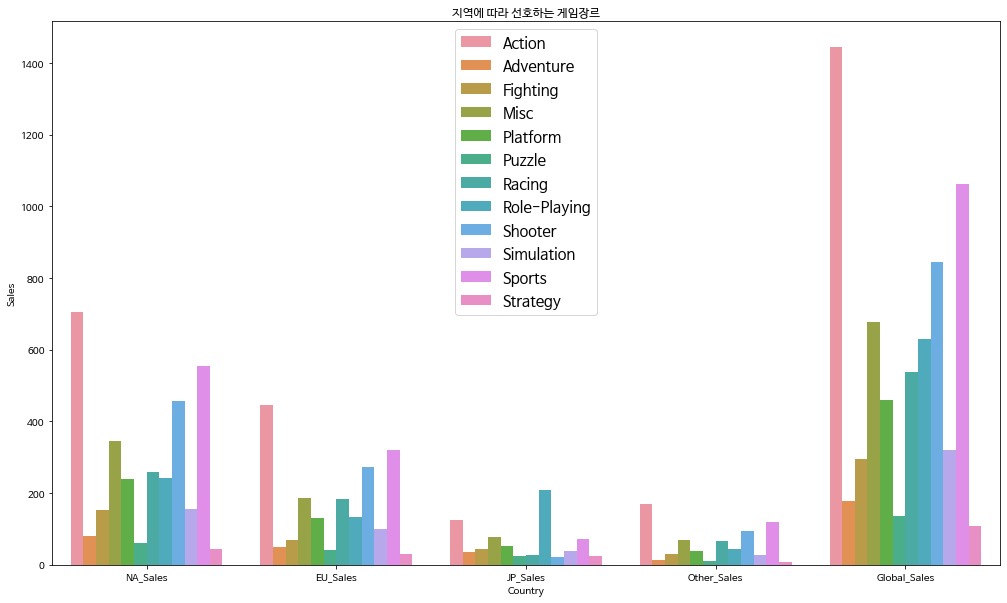

In [ ]:
plt.figure(figsize=(17,10))
sns.barplot(data=genre_melted,x='Country',y='Sales',hue='Genre')
plt.legend(fontsize=15)
plt.title('지역에 따라 선호하는 게임장르')
plt.show()

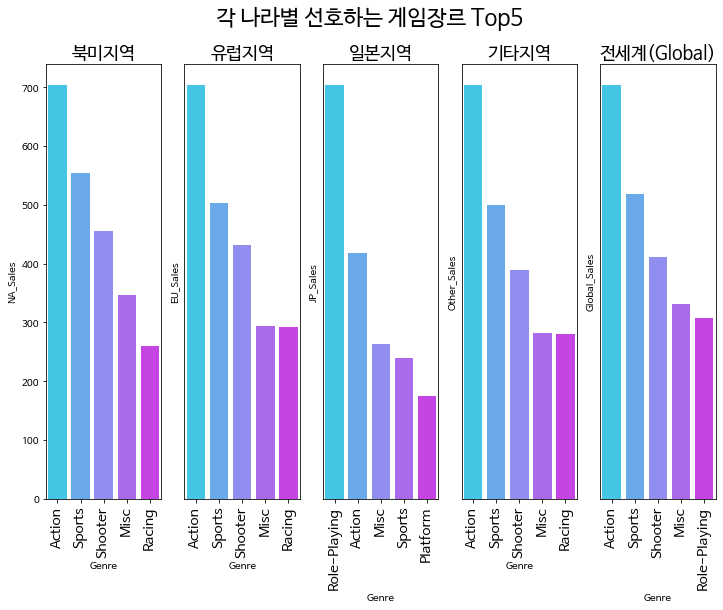

In [ ]:
#지역에 따른 선호하는 게임장르
NA=df.pivot_table('NA_Sales',columns='Genre',aggfunc='sum').T
NA=NA.sort_values(by='NA_Sales',ascending=False).iloc[0:5]
NA_games=NA.index

EU=df.pivot_table('EU_Sales',columns='Genre',aggfunc='sum').T
EU=EU.sort_values(by='EU_Sales',ascending=False).iloc[0:5]
EU_games=EU.index

JP=df.pivot_table('JP_Sales',columns='Genre',aggfunc='sum').T
JP=JP.sort_values(by='JP_Sales',ascending=False).iloc[0:5]
JP_games=JP.index

Other=df.pivot_table('Other_Sales',columns='Genre',aggfunc='sum').T
Other=Other.sort_values(by='Other_Sales',ascending=False).iloc[0:5]
Other_games=Other.index

Global=df.pivot_table('Global_Sales',columns='Genre',aggfunc='sum').T
Global=Global.sort_values(by='Global_Sales',ascending=False).iloc[0:5]
Global_games=Global.index
colors=sns.color_palette('cool',len(NA))

fig=plt.figure(figsize=(12,8))

ax1=fig.add_subplot(1,5,1)
ax1.set_xticklabels(labels=NA_games,rotation=90,size=14)
sns.barplot(x=NA_games,y=NA['NA_Sales'],palette=colors)
plt.title('북미지역',size=18)
plt.ylabel('NA_Sales')

ax2 = fig.add_subplot(1,5,2)
ax2.set_xticklabels(labels = EU_games, rotation =90, size = 14)
plt.yticks([])
sns.barplot(x = EU_games, y = EU['EU_Sales'],palette = colors)
plt.title('유럽지역', size = 18)

ax3 = fig.add_subplot(1,5,3)
ax3.set_xticklabels(labels = JP_games, rotation=90, size=14)
plt.yticks([])
sns.barplot(x=JP_games, y=JP['JP_Sales'],palette = colors)
plt.title('일본지역', size=18)



ax4 = fig.add_subplot(1,5,4)
ax4.set_xticklabels(labels = Other_games, rotation=90, size=14)
plt.yticks([])
sns.barplot(x=Other_games, y=Other['Other_Sales'],palette = colors)
plt.title('기타지역', size=18)


ax5 = fig.add_subplot(1,5,5)
ax5.set_xticklabels(labels = Global_games, rotation=90, size=14)
plt.yticks([])
sns.barplot(x=Global_games, y=Global['Global_Sales'],palette = colors)
plt.title('전세계(Global)', size=18)
plt.suptitle('각 나라별 선호하는 게임장르 Top5', size=22)
plt.show()

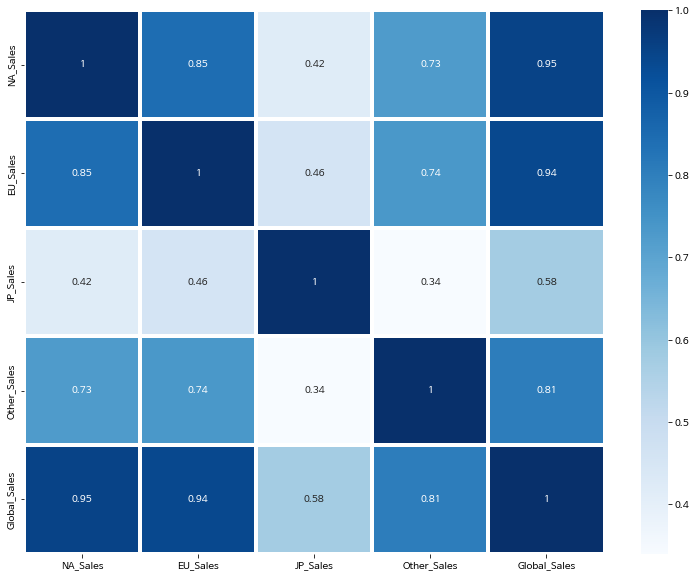

In [ ]:
df2=df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
plt.figure(figsize = (13,10))
sns.heatmap(df2.corr(), cmap = 'Blues', annot = True, linewidth = 3)

일본을 제외한 북미, 유럽, 다른 출시량은 비슷한 양상을 띈다. 상관관계가 있다. 게임장르와 관련한 전반적인 방향은 북미, 유럽 순으로 보면 될 것 같고 일본은 조금 특이하다고 보면 됨/일본을 제외한 북미,유럽 출시량을 기준으로 다음 분기에 게임 준비하면 됨 /전세계 게임동향을 살필때는 일본을 제외한 북미, 유럽 기준으로 준비

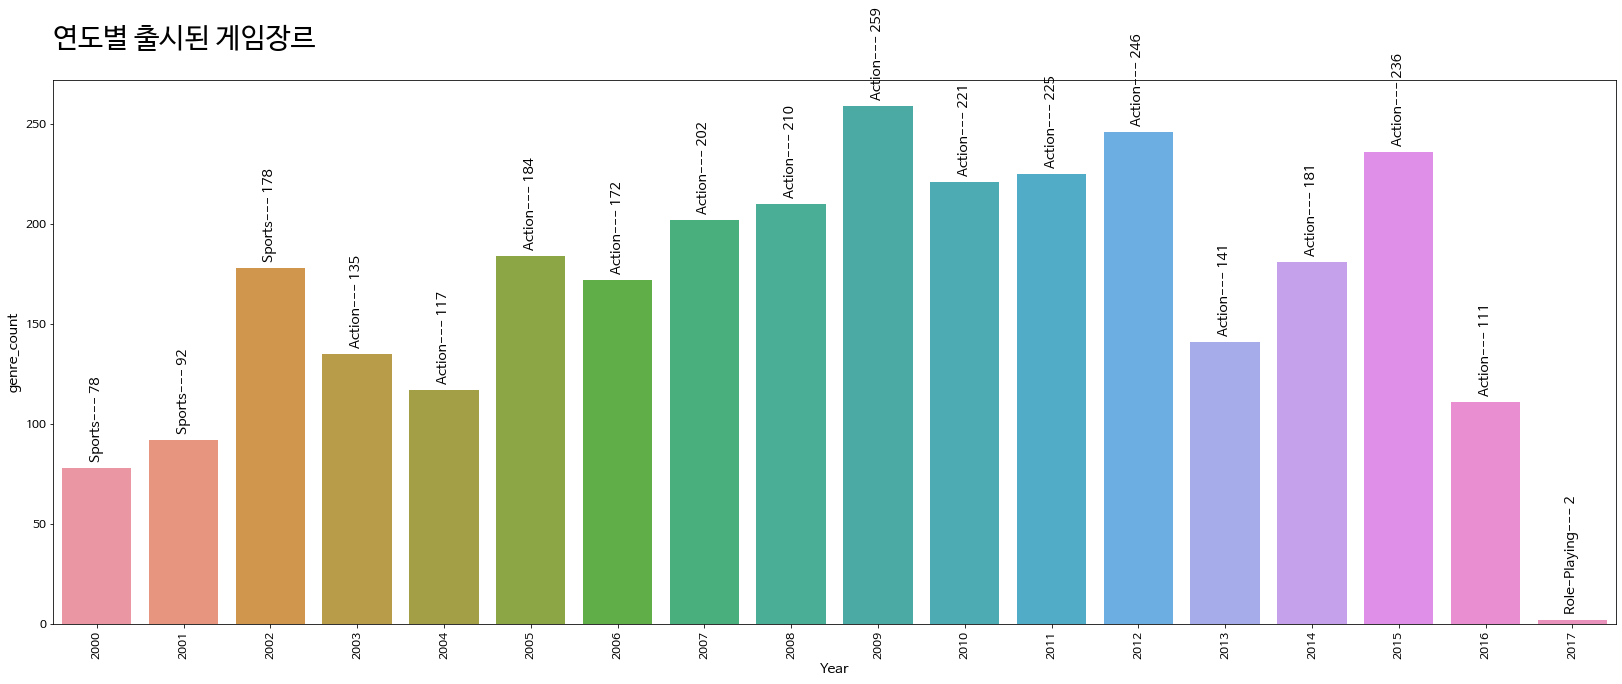

In [ ]:
#연도별 게임의 트렌드-장르


year_max_gr = df.groupby(['Year', 'Genre']).size().reset_index(name='genre_count')

condition = year_max_gr.groupby(['Year'])['genre_count'].transform(max) == year_max_gr['genre_count']
year_max_gr = year_max_gr[condition].reset_index(drop=True)

year_max_gr = year_max_gr.drop_duplicates(subset=['Year','genre_count'], keep='last').reset_index(drop=True)
year_max_gr.columns = ['Year', 'Genre', 'genre_count']


Genre = year_max_gr['Genre'].values


plt.figure(figsize=(28,10))
ax = sns.barplot(x='Year', y='genre_count', data=year_max_gr)
idx = 0
for value in year_max_gr['genre_count']:
    ax.text(x=idx, y=value + 5, s=str(Genre[idx] + '---' + ' ' + str(value)),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Year', fontsize=14)
plt.ylabel('genre_count', fontsize=14)
ax.set_title('연도별 출시된 게임장르', fontsize=28, y=1.05, loc='left')
plt.show();

연도별로는 액션이 주로 인기가 많음

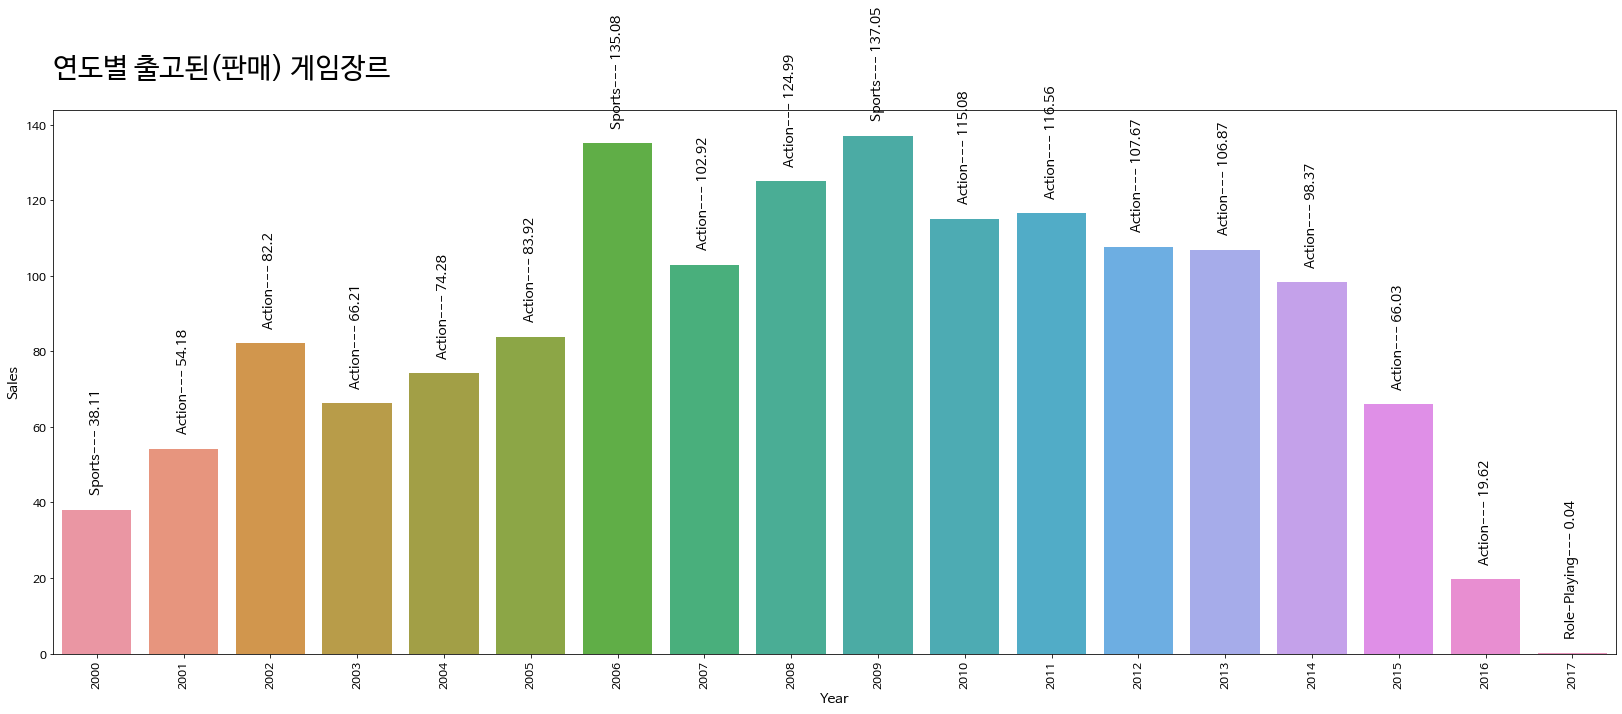

In [ ]:

year_sales_gr = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index(name='sales')
condition = year_sales_gr['sales'] == year_sales_gr.groupby(['Year'])['sales'].transform(max)
year_sales_gr = year_sales_gr[condition]


year_sales_gr = year_sales_gr.drop_duplicates(subset=['Year','sales'], keep='last').reset_index(drop=True)

year_sales_gr.columns = ['Year', 'Genre', 'Sales']

genre = year_sales_gr.Genre


plt.figure(figsize=(28,10))
ax = sns.barplot(x='Year', y='Sales', data=year_sales_gr)
idx = 0
for value in year_sales_gr['Sales']:
    ax.text(x=idx, y=value + 5, s=str(genre[idx] + '---' + ' ' + str(round(value, 2))),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales', fontsize=14)
ax.set_title('연도별 출고된(판매) 게임장르', fontsize=28, y=1.05, loc='left')
plt.show()

지역에 따른 선호하는 게임장르 살펴보았을 시 전반적으로(Global Action은 액션>스포츠) 순이고 2006년, 2009년에는 당시 출시된 게임은 액션>스포츠이지만 실제 출고량,판매량,인기는 스포츠였음. 2006년,2008년 어떤 특정 한 게임이 과도하게 인기있었던 건 아니었는지 살펴볼 필요있음 

대체로 액션과 스포츠가 많이 만들어지고 인기있었지만 많이 출시되었다고 해서 꼭 많이 팔린 건 아니었다. 이에 대한 어떤 한 특정 게임이 과도하게 인기가 있었던 건 아니었는 지 살펴볼 필요가 잇다. 

특히 2006년,2009년의 경우 스포츠의 판매량이 2000년부터 2017년까지 탑2,탑1인데 당시에는 action이 스포츠보다 더 많이 출시되었던 한 해였음. 어떤 스포츠 게임인지 알아볼 필요있음 

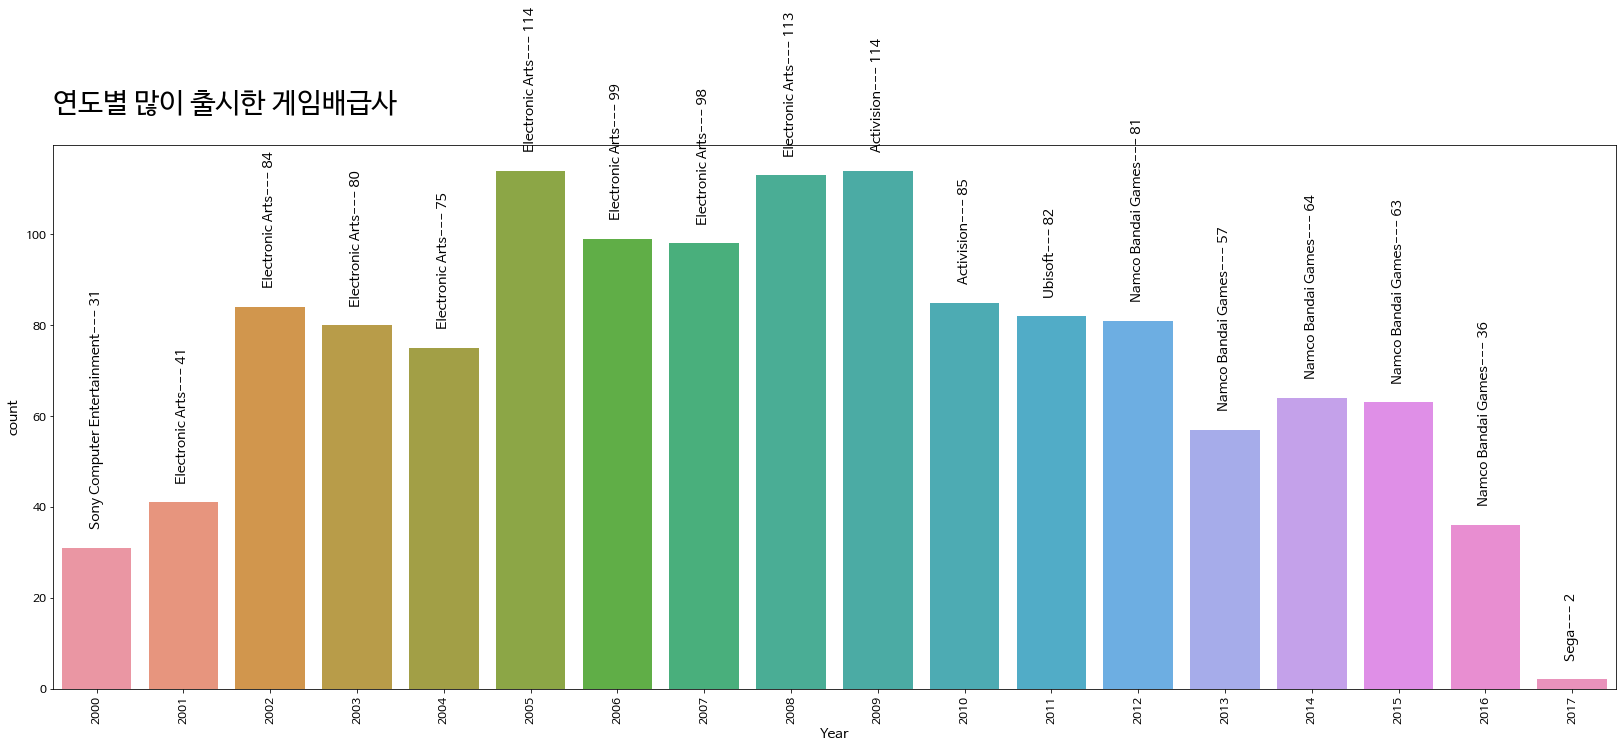

In [ ]:
#연도별로 많이 출시한 게임배급사

year_max_pb = df.groupby(['Year', 'Publisher']).size().reset_index(name='count')

condition = year_max_pb.groupby(['Year'])['count'].transform(max) == year_max_pb['count']
year_max_pb = year_max_pb[condition].reset_index(drop=True)

year_max_pb = year_max_pb.drop_duplicates(subset=['Year','count'], keep='last').reset_index(drop=True)
year_max_pb.columns = ['Year', 'Publisher', 'count']


Publisher = year_max_pb['Publisher'].values


plt.figure(figsize=(28,10))
ax = sns.barplot(x='Year', y='count', data=year_max_pb)
idx = 0
for value in year_max_pb['count']:
    ax.text(x=idx, y=value + 5, s=str(Publisher[idx] + '---' + ' ' + str(value)),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Year', fontsize=14)
plt.ylabel('count', fontsize=14)
ax.set_title('연도별 많이 출시한 게임배급사', fontsize=28, y=1.05, loc='left')
plt.show();

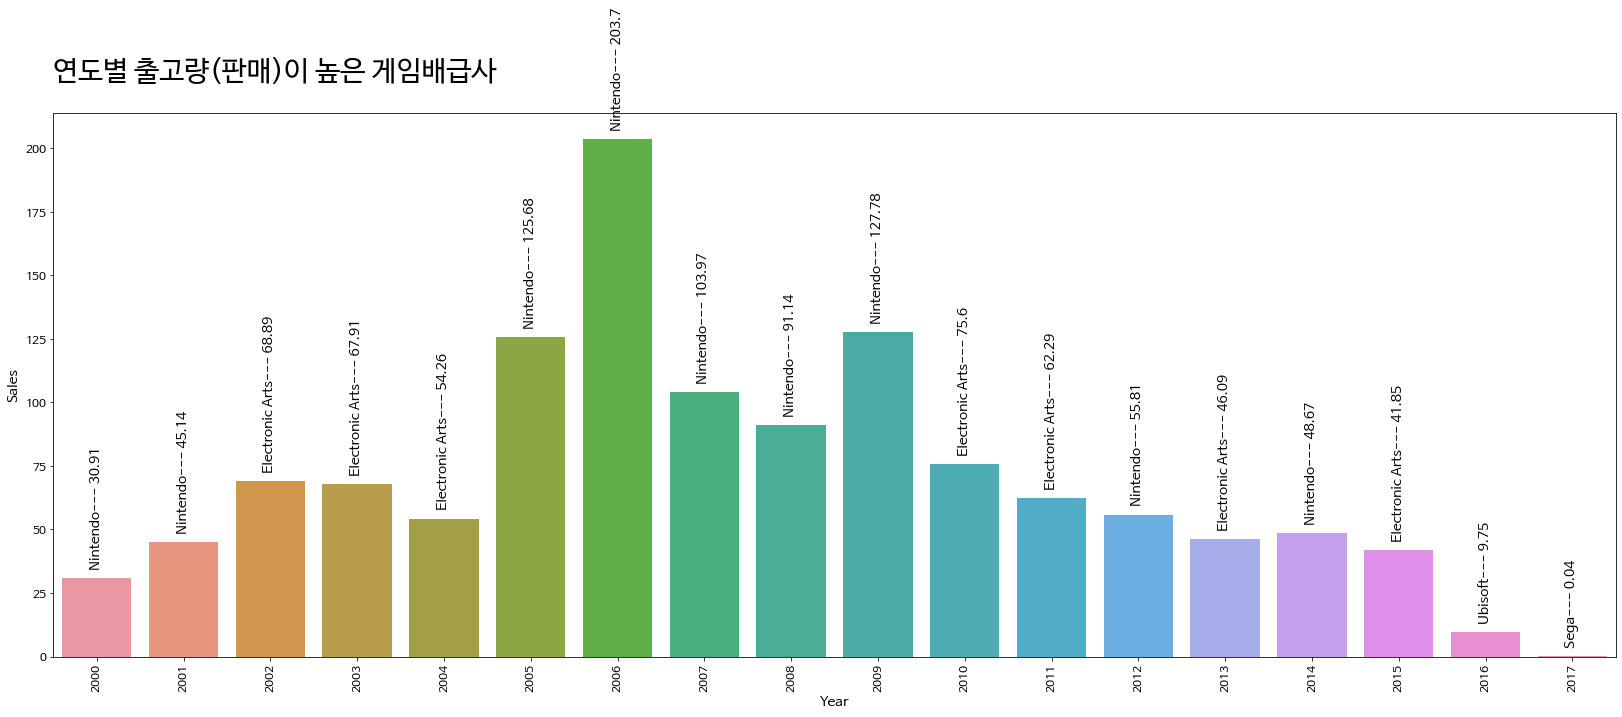

In [ ]:
#연도별 많이 출고된 게임 배급사


year_sales_com = df.groupby(['Year', 'Publisher'])['Global_Sales'].sum().reset_index(name='sales')
condition = year_sales_com['sales'] == year_sales_com.groupby(['Year'])['sales'].transform(max)
year_sales_com = year_sales_com[condition]

year_sales_com = year_sales_com.drop_duplicates(subset=['Year','sales'], keep='last').reset_index(drop=True)

year_sales_com.columns = ['Year', 'Publisher', 'Sales']

publisher = year_sales_com.Publisher


plt.figure(figsize=(28,10))
ax = sns.barplot(x='Year', y='Sales', data=year_sales_com)
idx = 0
for value in year_sales_com['Sales']:
    ax.text(x=idx, y=value + 5, s=str(publisher[idx] + '---' + ' ' + str(round(value, 2))),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales', fontsize=14)
ax.set_title('연도별 출고량(판매)이 높은 게임배급사', fontsize=28, y=1.05, loc='left')
plt.show()

게임회사의 게임출시량과 판매량은 다르다. Elctoronic Arts가 많이 출시되었지만 Nintendo가 더 많이 판매됨. 

눈여겨볼 필요가 있었던 2006년,2009년은 다른 년도들에 비해 유독 판매량이 많았음을 알 수 있고 두 해 모두 닌텐도였다.특히 Electronic Arts은 전반적으로 많은 판매량(출고량)을 보여주었지만 2005년부터 2008년에는 출시량이 많았음에도 불구하여 닌텐도를 이길 순 없었다. 특히 2006년에는 닌텐도가 인기가 독보적으로 많았음을 알 수 있는 데 자세히 살펴볼 필요가 있다. 

이 부분 가설검정으로 사용할 수 있지 않을까? 게임출시량과 판매량은 같다(귀무가설),다르다(대립가설)


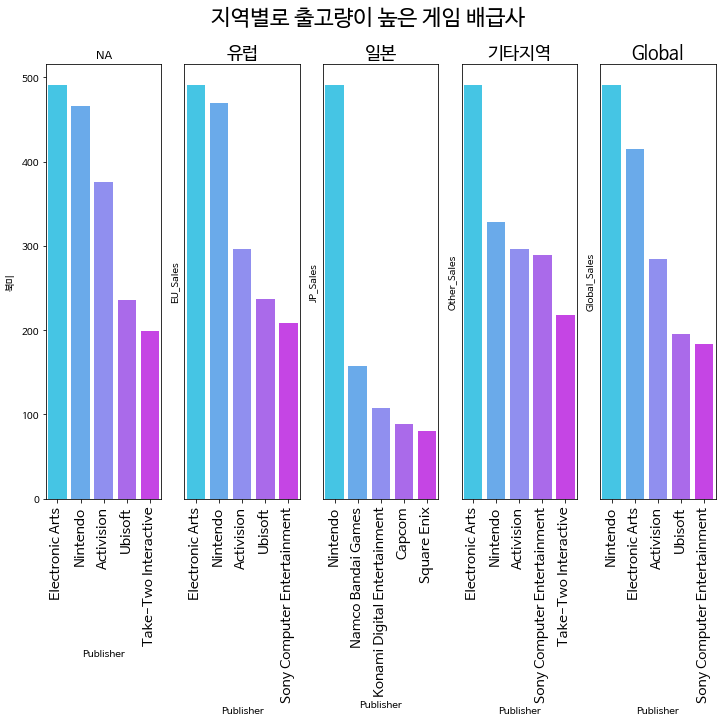

In [ ]:
NA=df.pivot_table('NA_Sales',columns='Publisher',aggfunc='sum').T
NA=NA.sort_values(by='NA_Sales',ascending=False).iloc[0:5]
NA_games=NA.index

EU=df.pivot_table('EU_Sales',columns='Publisher',aggfunc='sum').T
EU=EU.sort_values(by='EU_Sales',ascending=False).iloc[0:5]
EU_games=EU.index

JP=df.pivot_table('JP_Sales',columns='Publisher',aggfunc='sum').T
JP=JP.sort_values(by='JP_Sales',ascending=False).iloc[0:5]
JP_games=JP.index

Other=df.pivot_table('Other_Sales',columns='Publisher',aggfunc='sum').T
Other=Other.sort_values(by='Other_Sales',ascending=False).iloc[0:5]
Other_games=Other.index

Global=df.pivot_table('Global_Sales',columns='Publisher',aggfunc='sum').T
Global=Global.sort_values(by='Global_Sales',ascending=False).iloc[0:5]
Global_games=Global.index

colors=sns.color_palette('cool',len(NA))

fig=plt.figure(figsize=(12,8))

ax1=fig.add_subplot(1,5,1)
ax1.set_xticklabels(labels=NA_games,rotation=90,size=14)
sns.barplot(x=NA_games,y=NA['NA_Sales'],palette=colors)
plt.title('NA')
plt.ylabel('북미')

ax2 = fig.add_subplot(1,5,2)
ax2.set_xticklabels(labels = EU_games, rotation =90, size = 14)
plt.yticks([])
sns.barplot(x = EU_games, y = EU['EU_Sales'],palette = colors)
plt.title('유럽', size = 18)


ax3 = fig.add_subplot(1,5,3)
ax3.set_xticklabels(labels = JP_games, rotation=90, size=14)
plt.yticks([])
sns.barplot(x=JP_games, y=JP['JP_Sales'],palette = colors)
plt.title('일본', size=18)


ax4 = fig.add_subplot(1,5,4)
ax4.set_xticklabels(labels = Other_games, rotation=90, size=14)
plt.yticks([])
sns.barplot(x=Other_games, y=Other['Other_Sales'],palette = colors)
plt.title('기타지역', size=18)


ax5 = fig.add_subplot(1,5,5)
ax5.set_xticklabels(labels = Global_games, rotation=90, size=14)
plt.yticks([])
sns.barplot(x=Global_games, y=Global['Global_Sales'],palette = colors)
plt.title('Global', size=18)
plt.suptitle('지역별로 출고량이 높은 게임 배급사 ', size=22)
plt.show()

전반적으로 출시한 게임이 많은 회사인 Electronic Arts가 북미,유럽,다른 국가에서 많이 출고,판매가 되었음을 알 수 있으나 전체 출고량,판매량을 살펴보면 닌텐도가 압도적으로 출고,판매되었음을 알 수 있고, 이는 앞에서 계속 추측했듯이 특정 닌텐도 게임이 인기있었음을 추측해볼 수 있다. 

장르에서도 다른 국가들과 전반적국가와 달리 일본은 특이점을 보여주었었는데 게임 배급사 또한 일본은 다르다는 것을 보여준다.
대부분의 국가들은 Electronic Arts(미국),Nintendo(일본),Activision(미국),Ubisoft(프랑스),Sony Cotmputer Entertainment(일본),Take-Two Interactive(미국) 등 비슷비슷한 배급사의 선호를 보여주었으나
일본은 Nintendo를 제외하고는 대부분의 국가들과 다른 점을 보여주고 있다.
Namco bandai games(일본),Konami digital entertainment(일본),Capcom(일본),Square Enix(일본) 자국의 배급사 게임을 선호한다. 


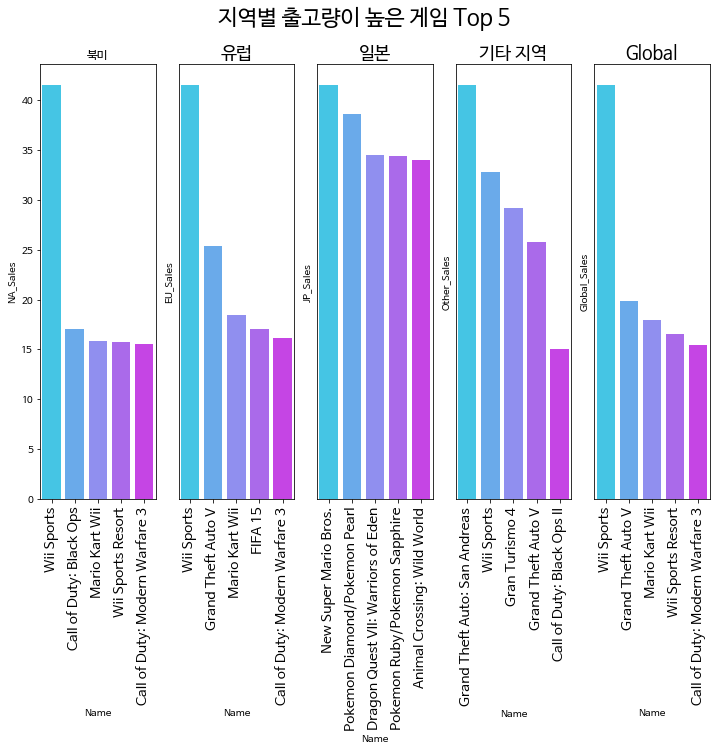

In [ ]:
#지역별 출고량이 높은 게임 top5 
NA=df.pivot_table('NA_Sales',columns='Name',aggfunc='sum').T
NA=NA.sort_values(by='NA_Sales',ascending=False).iloc[0:5]
NA_games=NA.index

EU=df.pivot_table('EU_Sales',columns='Name',aggfunc='sum').T
EU=EU.sort_values(by='EU_Sales',ascending=False).iloc[0:5]
EU_games=EU.index

JP=df.pivot_table('JP_Sales',columns='Name',aggfunc='sum').T
JP=JP.sort_values(by='JP_Sales',ascending=False).iloc[0:5]
JP_games=JP.index

Other=df.pivot_table('Other_Sales',columns='Name',aggfunc='sum').T
Other=Other.sort_values(by='Other_Sales',ascending=False).iloc[0:5]
Other_games=Other.index

Global=df.pivot_table('Global_Sales',columns='Name',aggfunc='sum').T
Global=Global.sort_values(by='Global_Sales',ascending=False).iloc[0:5]
Global_games=Global.index

colors=sns.color_palette('cool',len(NA))


fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(1,5,1)
ax1.set_xticklabels(labels=NA_games,rotation=90,size=14)
sns.barplot(x=NA_games,y=NA['NA_Sales'],palette=colors)
plt.title('북미')
plt.ylabel('NA_Sales')

ax2 = fig.add_subplot(1,5,2)
ax2.set_xticklabels(labels = EU_games, rotation =90, size = 14)
plt.yticks([])
sns.barplot(x = EU_games, y = EU['EU_Sales'],palette = colors)
plt.title('유럽', size = 18)

ax3 = fig.add_subplot(1,5,3)
ax3.set_xticklabels(labels = JP_games, rotation=90, size=14)
plt.yticks([])
sns.barplot(x=JP_games, y=JP['JP_Sales'],palette = colors)
plt.title('일본', size=18)


ax4 = fig.add_subplot(1,5,4)
ax4.set_xticklabels(labels = Other_games, rotation=90, size=14)
plt.yticks([])
sns.barplot(x=Other_games, y=Other['Other_Sales'],palette = colors)
plt.title('기타 지역', size=18)


ax5 = fig.add_subplot(1,5,5)
ax5.set_xticklabels(labels = Global_games, rotation=90, size=14)
plt.yticks([])
sns.barplot(x=Global_games, y=Global['Global_Sales'],palette = colors)
plt.title('Global', size=18)
plt.suptitle('지역별 출고량이 높은 게임 Top 5', size=22)
plt.show()

앞에서도 보았듯이 일본은 많이 출고된 게임에 대해서도 다른 국가들과 확연히 다른 점을 보여주고 있다. 그리고 장르와 배급사에 대해서 일본을 제외하고 다른 국가들은 동일하거나 비슷한 서열의 선호를 보여왔었는데 각각의 게임에 대해서는 다른 선호를 보임을 알 수 있다. 세계적인(Global) 게임에 대한 출고량은 유럽과 가장 비슷하며 그 다음으로는 북미와 비슷하다. 이에 게임 출시 전에 방향을 알고싶으면 유럽,북미 순으로 시장조사를 해야한다. 일본은 게임시장에서 특이한 행보를 보인다.





눈 여겨볼 특이점은 북미,유럽,기타 국가들 등 세계적인 높은 판매량은 보이는 Wii Sports가 일본에서는 그다지 많이 출고되지 않았다, 즉 일본에서는 그리 인기가 없었다라는 것이다. 일본은 게임시장에서 특이한 행보를 보인다. 

In [ ]:
df[df['Name']=='Wii Sports'] #세계적인 판매량 1위 #장르 스포츠

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [ ]:
df[df['Name']=='New Super Mario Bros.'] #일본에서 1위

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.5,2.9,30.01


위의 그래프에서 보았듯이 Wii Sports는 일본을 제외한 다른 국가에는 출고량이 많았고 일본에서 1위 출고량을 보였던 해당 게임은 Wii Sports와 동일한 2006년이었다. 즉, 일본은 2006년에 세계적으로 많은 출고량,인기를 보였던 wii Sports가 아닌 New Super Mario Bros를 선호함을 보인다.

In [ ]:
df[df['Name']=='Grand Theft Auto V'] #유럽2위, 세계 22위 #장르 액션 #35.83

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2008,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
10834,Grand Theft Auto V,XOne,2014,Action,Take-Two Interactive,2.66,2.01,0.00,0.41,5.08
16575,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08


In [ ]:
df[df['Name']=='Grand Theft Auto V'].sum()

Name            Grand Theft Auto VGrand Theft Auto VGrand Thef...
Platform                                             PS4PS3XOnePC
Year                                                         8056
Genre                                    ActionActionActionAction
Publisher       Take-Two InteractiveTake-Two InteractiveTake-T...
NA_Sales                                                    13.83
EU_Sales                                                    17.73
JP_Sales                                                     1.33
Other_Sales                                                  6.65
Global_Sales                                                39.54
dtype: object

In [ ]:
df[df['Name']=='Mario Kart Wii'] #유럽3위,세계 3위

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83


In [ ]:
df[df['Name']=='Wii Sports Resort'] #세계 4위

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.0


In [ ]:
df[df['Name']=='Call of Duty: Modern Warfare 3'] #세계 5위

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2809,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
4992,Call of Duty: Modern Warfare 3,Wii,2011,Shooter,Activision,0.60,0.21,0.00,0.08,0.89
11180,Call of Duty: Modern Warfare 3,PC,2011,Shooter,Activision,0.41,0.98,0.00,0.33,1.72
14120,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.47


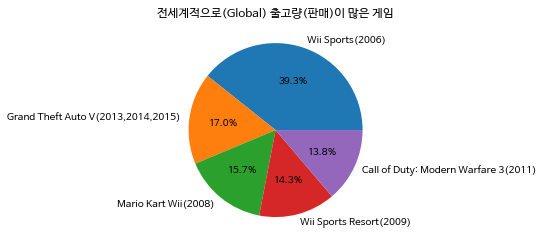

In [ ]:
values=[82.74, 35.83, 33.00, 30.01, 29.01]
games=['Wii Sports(2006)','Grand Theft Auto V(2013,2014,2015)','Mario Kart Wii(2008)','Wii Sports Resort(2009)','Call of Duty: Modern Warfare 3(2011)']

plt.pie(values,labels=games,autopct='%.1f%%')
plt.title('전세계적으로(Global) 출고량(판매)이 많은 게임')
plt.show()

2006년에 출시된 Wii Sports 세계적인 출고량은 다른 높은 출고량과 비교해서 게임의 독보적인 인기를 보여준다.  

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 233 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 233 missing from current font.
  font.set_text(s, 0, flags=flags)


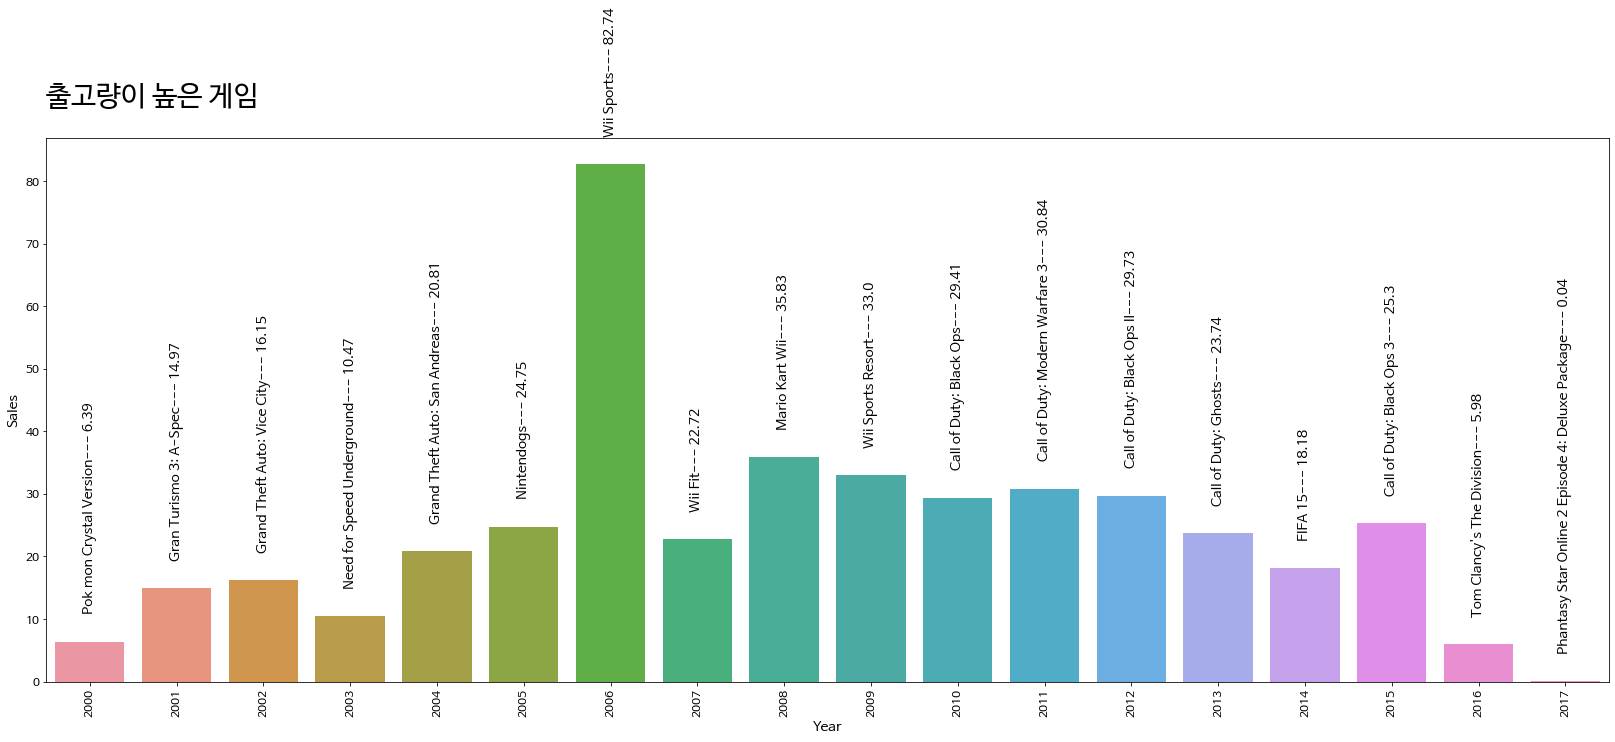

In [ ]:
#연도별 많이 출고된 게임

year_sales_game = df.groupby(['Year', 'Name'])['Global_Sales'].sum().reset_index(name='sales')
condition = year_sales_game['sales'] == year_sales_game.groupby(['Year'])['sales'].transform(max)
year_sales_game = year_sales_game[condition]

year_sales_game = year_sales_game.drop_duplicates(subset=['Year','sales'], keep='last').reset_index(drop=True)

year_sales_game.columns = ['Year', 'Publisher', 'Sales']

publisher = year_sales_game.Publisher


plt.figure(figsize=(28,10))
ax = sns.barplot(x='Year', y='Sales', data=year_sales_game)
idx = 0
for value in year_sales_game['Sales']:
    ax.text(x=idx, y=value + 5, s=str(publisher[idx] + '---' + ' ' + str(round(value, 2))),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales', fontsize=14)
ax.set_title('출고량이 높은 게임', fontsize=28, y=1.05, loc='left')
plt.show()



*  엑스박스 360, PS3와 경쟁했으며 모션 센서가 적용된 "체감형" 컨트롤러와 독창적인 액세서리를 마케팅 포인트로 잡아 경쟁 기종들보다 늦게 출시되었음에도 굉장한 판매량을 기록하며 당대 콘솔 시장의 승자로 자리매김했다.
*  출시 후 수많은 경영학 연구들에서 Wii의 사례가 인용되었으며 특히 블루오션 전략과 '파괴적 혁신'이라는 개념의 대표적 사례로 불리고 있다. 사실상 21세기 들어 닌텐도가 혁신적인 이미지를 가지게 된 데에는 닌텐도 DS와 함께 이 게임기의 영향이 크다.
*  덤으로 게임큐브와의 완전한 하위 호환을 지원하기 때문에 부차적으로 콘솔의 판매 부진과 덩달아 판매 부진에 시달리던 게임큐브 소프트웨어의 판매량이 늘어나는 효과를 보기도 했다
*게임큐브의 실패로 신선함을 추구하며 후다닥 발표된 물건이었지만 그 신선함이 먹혀 들어가 큰 반향을 불러일으켰다. Wii가 상당히 이질적인 콘솔이라고 여겨지는 일이 많은데 이러한 레거시들을 조합해 튀어나온 Wii는 말 그대로 대박이 난다
* 우수한 기술이 우수한 게임을 탄생시키는 것은 아니다. 첨단 기술은 오히려 개발과 생산에 비용을 발생시켜 아이디어를 경직시킬 뿐더러 고가의 게임이 되어버린다. *기존의 기술을 다른 방향으로 활용하면 전혀 새로운 것을 창조해 낼 수 있다.* — 요코이 군페이
+

*이전까지의 닌텐도 콘솔이 전형적인 플랫폼 비즈니스에 기반을 두고 있었다면 Wii는 그러한 생태계의 구축보다도 시장 밖에 존재하는 잠재적 소비자들을 끌어모으는 것을 전략의 중심으로 삼았다.
(“We are not competing against Sony or Microsoft,” Iwata once told Fortune magazine. “We are battling the indifference of people who have no interest in video games.”)
*'파괴적 혁신'이라는 이론으로 잘 알려진 《혁신기업의 딜레마》의 저자이자 이와타 사토루가 이런 전략을 구상하는 데 영감이 되었던 경영학자 클레이튼 크리슨텐슨도 Wii를 기존 게임 시장의 진입장벽을 낮춰 소비하지 않음(nonconsumption)과 경쟁할 수 있게 해주는 고전적인 파괴적(disruptive) 전략이다고 평가하였다. 그는 Wii를 1990년대 이후 일본 기업의 유일한 파괴적 혁신(Disruptive innovation) 사례로 꼽았다. 더 뉴요커는 다른 경쟁사들이 거실을 점령하기 위해 멀티미디어 허브를 구축하려고 애쓰는 동안 닌텐도는 그저 게임 그 자체의 재미와 개성에만 집중한 것이 성공의 요인이라고 평가했다.

*더 나은 사양의 더 강력한 시스템 (Microsoft,Sony)에 초점을 맞추는 대신 닌텐도는 사람들이 다양한 방식으로 게임을 즐길 수 있도록 하고 비디오 게임을 하지 않는 새로운 고객을 끌어들이는 시스템 구축에 집중했습니다.-마케팅 필요성
(마케팅은 제품의 싸움이 아니다. 마케팅은 인식의 싸움이다. )
*It understood that the barrier to new consumers using video game systems was the complexity of game play, not the quality of existing graphics. By removing that barrier, it has been able to compete against nonconsumption and create a significant growth business. It is a classic disruptive strategy.
*Nintendo knew that it could not compete with Microsoft and Sony in the quest to build the ultimate home-entertainment device. So it decided, with the Wii, to play a different game entirely. Some pundits are now speculating, ironically, that the simplicity of the Wii may make it a huge hit


*나중에 마무리 멘트

*우수한 기술이 우수한 게임을 탄생시키는 것은 아니다. 첨단 기술은 오히려 개발과 생산에 비용을 발생시켜 아이디어를 경직시킬 뿐더러 고가의 게임이 되어버린다. 기존의 기술을 다른 방향으로 활용하면 전혀 새로운 것을 창조해 낼 수 있다. — 요코이 군페이 *이탤릭체 텍스트*
*요코이 군페이 인용하면서 마케팅 관점으로 보이지 않았던 새로운 시야를 밝혀드리겠습니다. 
*마케팅은 제품의 싸움이 아니다. 마케팅은 인식의 싸움이다. 
*아무리 좋은 게임이더라도 인기가 없다면, Re_Branding을 해야할 때입니다.
*귀사의 Re_Branding을 통해 제대로된 Re_Start를 응원합니다. 

Platform에 관해 데이터분석도 진행하였으나 유의미한 영향을 줄 것 같지 않아 발표에 넣지 낳았습니다. 

In [ ]:
df[['Year','Global_Sales']].sort_values(by='Global_Sales',ascending=False).head(20)

In [ ]:
#연도별 많이 만들어진 platform 


year_max_pf = df.groupby(['Year', 'Platform']).size().reset_index(name='count')

condition = year_max_pf.groupby(['Year'])['count'].transform(max) == year_max_pf['count']
year_max_pf = year_max_pf[condition].reset_index(drop=True)

year_max_pf = year_max_pf.drop_duplicates(subset=['Year','count'], keep='last').reset_index(drop=True)
year_max_pf.columns = ['Year', 'Platform', 'count']

platform = year_max_pf['Platform'].values

plt.figure(figsize=(28,10))
ax = sns.barplot(x='Year', y='count', data=year_max_pf)
idx = 0
for value in year_max_pf['count']:
    ax.text(x=idx, y=value + 5, s=str(platform[idx] + '---' + ' ' + str(value)),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Year', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.show();

In [ ]:

#연도별 많이 팔린 출고된 플랫폼 



year_sales_pl = df.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index(name='sales')
condition = year_sales_pl['sales'] == year_sales_pl.groupby(['Year'])['sales'].transform(max)
year_sales_pl = year_sales_pl[condition]

year_sales_pl = year_sales_pl.drop_duplicates(subset=['Year','sales'], keep='last').reset_index(drop=True)

year_sales_pl.columns = ['Year', 'Platform', 'Sales']

platform = year_sales_pl.Platform


plt.figure(figsize=(28,10))
ax = sns.barplot(x='Year', y='Sales', data=year_sales_pl)
idx = 0
for value in year_sales_pl['Sales']:
    ax.text(x=idx, y=value + 5, s=str(platform[idx] + '---' + ' ' + str(round(value, 2))),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales', fontsize=14)
ax.set_title('Sales by Platform', fontsize=28, y=1.05, loc='left')
plt.show()
